# Помощь начальнику полиции Сырограда

  Город Сыроград известен своей фабрикой сыра — лучший сыр в мире производится именно здесь. Этот сыр обладает  выдающимися характеристиками: он имеет большой срок хранения и уникальный вкус. Из-за этого он недоступен большинству граждан города.  
  
 После производства, сыр развозится по складам, которые находятся в разных районах города. Каждый склад надежно охраняем. Однако, в последние 2 года участились случаи кражи сыра со склада. Полицейские не смогли понять ни по какой логике происходят кражи (например, почему в одном районе краж больше, чем в другом), ни можно ли предсказать, где будет следующая кража.  
  
 Однако, в ходе очередного сыскного мероприятия выяснилось, что в некоторых районах, где происходили кражи, также были разбиты  фонари. Полицейские предположили, что между фактами кражи и хулиганства есть какая-то взаимосвязь.  
 Начальник полицейского участка города Сыроград предоставил нам датасет.  
  
**Цель исследования**  
 Статистически значимо снизить количество краж в районах города.

## Загрузка данных и подготовка к анализу


Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats

from scipy.stats import pearsonr, spearmanr

Уберем ограничение по выводу строк, колонок и символов в записи и включаем игнорирование ошибок Jupiter.

In [2]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)


#Игнорируем предупреждения Jupiter
warnings.filterwarnings('ignore')

Запишем датафреймм first_part.csv и second_part.csv в датасеты fp и sp соответственно.

In [3]:
fp = pd.read_csv('Downloads/first_part.csv')
sp = pd.read_csv('Downloads/second_part.csv')

In [4]:
for i in (fp, sp):
    display(i.head())

    display(i.info())

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units
0,2024-01-26,Мышеостровский,Колбасовы,7,6
1,2024-01-26,Мышеостровский,Молочковы,10,9
2,2024-01-26,Мышеостровский,Мятновы,8,8
3,2024-01-26,Мышеостровский,Сметанинковы,8,7
4,2024-01-26,Краснокотейский,Колбасовы,7,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              17280 non-null  object
 1   District          17280 non-null  object
 2   Warehouse_Name    17280 non-null  object
 3   Number_of_Guards  17280 non-null  int64 
 4   Police_Units      17280 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 675.1+ KB


None

,Date,District,Warehouse_Name,Percent_of_Crime_Solved,Number_of_Lights
0,2024-01-26,Мышеостровский,Колбасовы,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,86.684716,1035


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     17280 non-null  object 
 1   District                 17280 non-null  object 
 2   Warehouse_Name           17280 non-null  object 
 3   Percent_of_Crime_Solved  17280 non-null  float64
 4   Number_of_Lights         17280 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 675.1+ KB


None

В нашем распоряжении:  
Датафрейм **fp** состоит из 5 колонок и 17280 строк, значение колонок:
`Date` - дата,
`District` - район города,
`Warehouse_Name` - название склада,
`Number_of_Guards` - количество охраны на складе
`Police_Units` - количество полицейских на район

Датафрейм **sp** состоит из 5 колонок и 17280 строк, значение колонок:
`Date` - дата,
`District` - район города,
`Warehouse_Name` - название склада,
`Percent_of_Crime_Solved` - процент раскрытых преступлений по уничтожению фонарей в районе
`Number_of_Lights` - количество фонарей в районе.

### Переименование столбцов

Приведем название столбцов к нижнему регистру.

In [5]:
fp.columns = fp.columns.str.lower()
sp.columns = sp.columns.str.lower()

print('Название столбцов в датафрейме fp - ', fp.columns.tolist())
print('Название столбцов в датафрейме sp - ', sp.columns.tolist())

Название столбцов в датафрейме fp -  ['date', 'district', 'warehouse_name', 'number_of_guards', 'police_units']
Название столбцов в датафрейме sp -  ['date', 'district', 'warehouse_name', 'percent_of_crime_solved', 'number_of_lights']


### Проверка на пропуски

In [6]:
for i in(fp, sp):
    display(pd.DataFrame(round(i.isna().mean()*100,1)).style.background_gradient('coolwarm'))

,0
date,0.000000
district,0.000000
warehouse_name,0.000000
number_of_guards,0.000000
police_units,0.000000


,0
date,0.000000
district,0.000000
warehouse_name,0.000000
percent_of_crime_solved,0.000000
number_of_lights,0.000000


Пропусков нет.

### Проверка на явные дубли

Проверим датафреймы на явные дубли.

In [7]:
print(f'Явных дублей в датафреме fp {fp.duplicated().sum()}')
print(f'Явных дублей в датафреме sp {sp.duplicated().sum()}')

Явных дублей в датафреме fp 0
Явных дублей в датафреме sp 0


Явных дублей нет.

### Проверка на неявные дубли

Проверим датафреймы на неявные дубли.

In [8]:
print(fp['district'].unique())
print(fp['warehouse_name'].unique())
print(sp['district'].unique())
print(sp['warehouse_name'].unique())

['Мышеостровский' 'Краснокотейский' 'Мышесельский' 'Петрокотский'
 'Приморский' 'Невский']
['Колбасовы' 'Молочковы' 'Мятновы' 'Сметанинковы']
['Мышеостровский' 'Краснокотейский' 'Мышесельский' 'Петрокотский'
 'Приморский' 'Невский']
['Колбасовы' 'Молочковы' 'Мятновы' 'Сметанинковы']


Неявных дублей в названии районов и складов нет.

Посмотрим, сколько складов указано в каждом районе.

In [9]:
for i in(fp, sp):
    display(i.groupby('district').agg({'warehouse_name':'nunique'}))

,warehouse_name
district,
Краснокотейский,4
Мышеостровский,4
Мышесельский,4
Невский,4
Петрокотский,4
Приморский,4


,warehouse_name
district,
Краснокотейский,4
Мышеостровский,4
Мышесельский,4
Невский,4
Петрокотский,4
Приморский,4


Мы видим, что в каждом районе есть по 4 склада, которые одинаково называются. 

### Объединение датафреймов

Для удобства дальнейшей работы объединим датафреймы fp и sp в один датафрейм df, на основании даты, названия района и названия склада.

Предварительно сохраним размер датафреймов.

In [10]:
fp_shape = fp.shape
sp_shape = sp.shape
print('Строк в fp', fp_shape[0])
print('Строк в sp', sp_shape[0])

Строк в fp 17280
Строк в sp 17280


Объединим датафреймы.

In [11]:
df = pd.merge(fp, sp, on=['date', 'district', 'warehouse_name'], how='inner')
print('Строк потеряно при объединении -', len(df) - fp_shape[0])

Строк потеряно при объединении - 0


Мы не потеряли ни одной строки.

In [12]:
display(df.head())
print(df.info())

,date,district,warehouse_name,number_of_guards,police_units,percent_of_crime_solved,number_of_lights
0,2024-01-26,Мышеостровский,Колбасовы,7,6,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,10,9,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,8,8,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,8,7,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,7,6,86.684716,1035


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 17279
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     17280 non-null  object 
 1   district                 17280 non-null  object 
 2   warehouse_name           17280 non-null  object 
 3   number_of_guards         17280 non-null  int64  
 4   police_units             17280 non-null  int64  
 5   percent_of_crime_solved  17280 non-null  float64
 6   number_of_lights         17280 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB
None


### Изменение типа данных

Для удобства работы приведем колонку с датами к типу данных дат.

In [13]:
df['date'] = df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print('Тип данных в колонке date -', df['date'].dtype)


Тип данных в колонке date - datetime64[ns]


**Вывод**  
Мы подготовили данные к анализу:

- привели название колонок к нижнему регистру;
- проверили датасеты на пропуски;
- проверили на явные и неявные дубли;
- объединили датафреймы в один;
- привели формат колонки дат к формату даты.

## Исследовательский анализ данных

### Даты в данных

Посмотрим, за какой период у нас представлены данные.

In [14]:
print(f'В датафрейме представлены данные с {df.date.min()} по {df.date.max()}')

#Посчитаем количество дней между минимальной и максимальной датой
df_days = (df.date.max() - df.date.min()) / np.timedelta64 ( 1 , 'D')

print('Дней в датафрейме пропущено -', df_days - df.date.nunique() + 1)

В датафрейме представлены данные с 2022-02-06 00:00:00 по 2024-01-26 00:00:00
Дней в датафрейме пропущено - 0.0


Мы видим, что в датафрейме есть ежедневные данные с 6 февраля 2022 года по 26 января 2024 года.

### Охраны на складах

Посмотрим, сколько охнанников может быть на складах.

In [15]:
df['number_of_guards'].describe()

count    17280.000000
mean         5.984317
std          2.700888
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: number_of_guards, dtype: float64

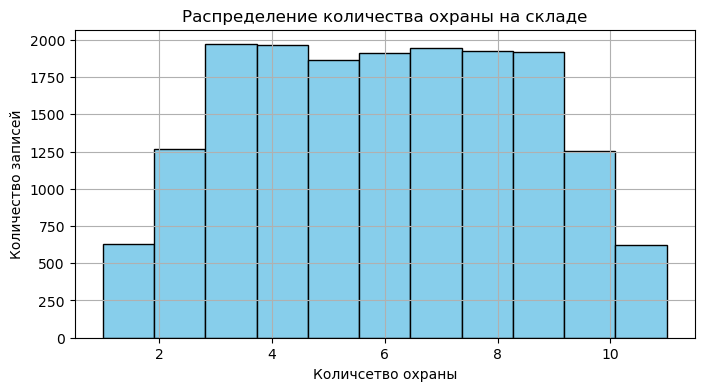

In [16]:
df.hist(column='number_of_guards', bins = 11, color='skyblue', edgecolor='black', figsize=(8, 4))

plt.title('Распределение количества охраны на складе')
plt.xlabel('Количсетво охраны')
plt.ylabel('Количество записей')
plt.show()

На складах бывает от 1 до 11 охранников, в среднем около 6 охранников.

### Полицейских в районе

Посмотрим, сколько полицейских может быть в районе.

In [17]:
df['police_units'].describe()

count    17280.000000
mean         4.982292
std          2.582339
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: police_units, dtype: float64

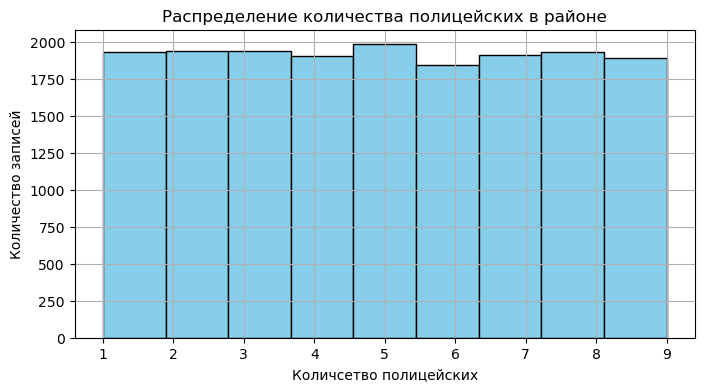

In [18]:
df.hist(column='police_units', bins = 9, color='skyblue', edgecolor='black', figsize=(8, 4))

plt.title('Распределение количества полицейских в районе')
plt.xlabel('Количсетво полицейских')
plt.ylabel('Количество записей')
plt.show()

В районе может быть от 1 до 9 полицейских, в среднем около 5.

### Процент раскрытых преступлений по уничтожению фонарей

Посмотрим, какой был процент раскрытия преступлений по уничтожению фонарей.

In [19]:
df['percent_of_crime_solved'].describe()

count    17280.000000
mean        69.111268
std         12.674158
min          1.686968
25%         62.313482
50%         69.586076
75%         76.905214
max        100.000000
Name: percent_of_crime_solved, dtype: float64

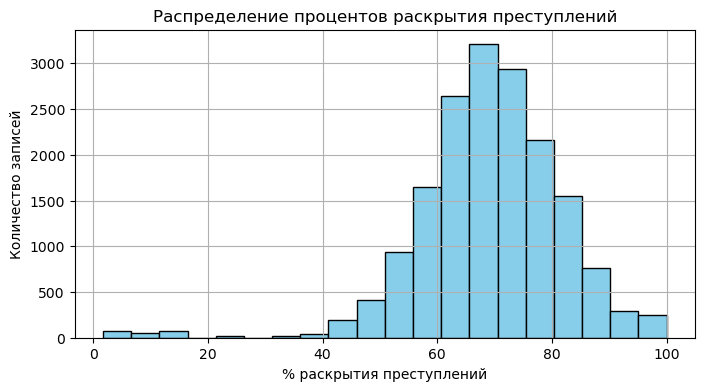

In [20]:
df.hist(column='percent_of_crime_solved', bins = 20, color='skyblue', edgecolor='black', figsize=(8, 4))

plt.title('Распределение процентов раскрытия преступлений')
plt.xlabel('% раскрытия преступлений')
plt.ylabel('Количество записей')
plt.show()

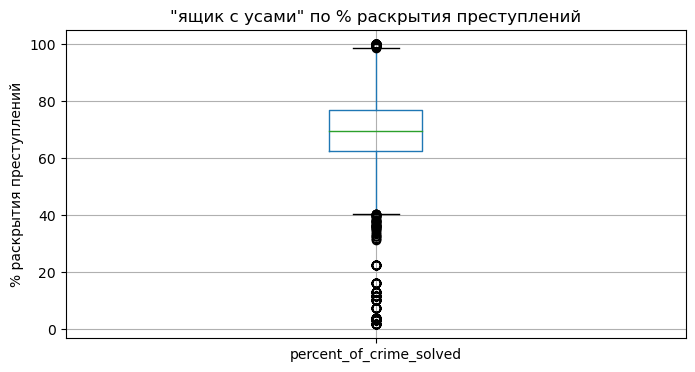

In [21]:
df.boxplot(column='percent_of_crime_solved', figsize=(8, 4))

plt.title('"ящик с усами" по % раскрытия преступлений')
plt.xlabel('')
plt.ylabel('% раскрытия преступлений')
plt.show()

За время наблюдения процент раскрытия преступлений был от 1,7% до 100%, в среднем около 69%. Можно сказать, что преступления раскерываются в основном от 40 до 98%. 

Посмотрим, есть ли отличия в среднем % раскрытия преступлений по районам и складу.

In [22]:
pd.pivot_table(df,
                              values='percent_of_crime_solved',
                              index='district',
                              columns='warehouse_name',
                              aggfunc="mean",
                              fill_value=0)

warehouse_name,Колбасовы,Молочковы,Мятновы,Сметанинковы
district,,,,
Краснокотейский,68.996260,69.054328,69.257332,68.939339
Мышеостровский,69.168210,69.040801,69.152006,69.200337
Мышесельский,69.195719,69.052525,69.314685,69.202944
Невский,69.169266,68.942565,69.113544,69.133955
Петрокотский,69.116445,68.930228,69.111505,69.002666
Приморский,69.151564,69.238778,69.026232,69.159209


Больших отличий нет.

### Количество фонарей в районе

Посмторим, сколько было фонарей в районе.

In [23]:
df['number_of_lights'].describe()

count    17280.000000
mean       697.967477
std        177.433022
min        151.000000
25%        572.000000
50%        688.000000
75%        812.000000
max       1619.000000
Name: number_of_lights, dtype: float64

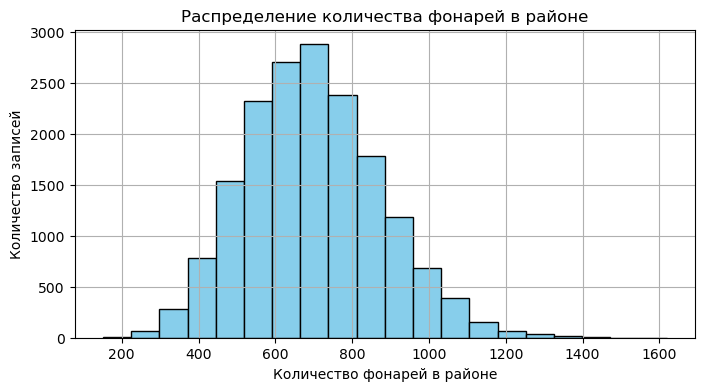

In [24]:
df.hist(column='number_of_lights', bins = 20, color='skyblue', edgecolor='black', figsize=(8, 4))

plt.title('Распределение количества фонарей в районе')
plt.xlabel('Количество фонарей в районе')
plt.ylabel('Количество записей')
plt.show()

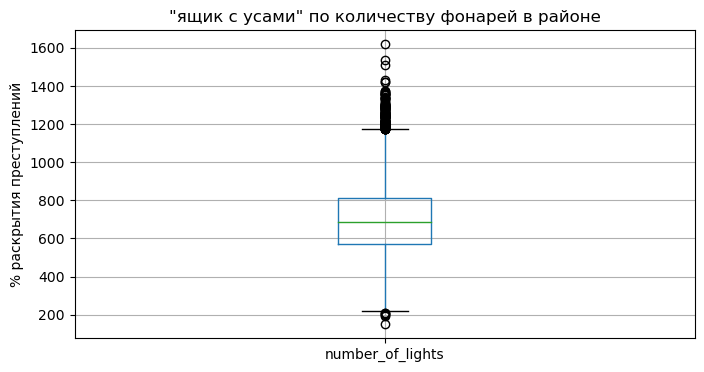

In [25]:
df.boxplot(column='number_of_lights', figsize=(8, 4))

plt.title('"ящик с усами" по количеству фонарей в районе')
plt.xlabel('')
plt.ylabel('% раскрытия преступлений')
plt.show()

Было от 151 до 1691 фонарей в районе, в среднем около 690. Можно сказать, что в основном в районах от 200 до 1200 фонарей.

**Вывод**  
Мы провели исследовательский анализ данных:

- в датафрейме есть ежедневные данные с 6 февраля 2022 года по 26 января 2024 года;
- на складах бывает от 1 до 11 охранников, в среднем около 6 охранников;
- в районе может быть от 1 до 9 полицейских, в среднем около 5;
- за время наблюдения процент раскрытия преступлений был от 1,7% до 100%, в среднем около 69%, можно сказать, что преступления раскерываются в основном от 40 до 98%;
- было от 151 до 1691 фонарей в районе, в среднем около 690, можно сказать, что в основном в районах от 200 до 1200 фонарей.

## Связь (корреляция)

Посмотрим на взаимосвязь данных в нашем датафрейме.

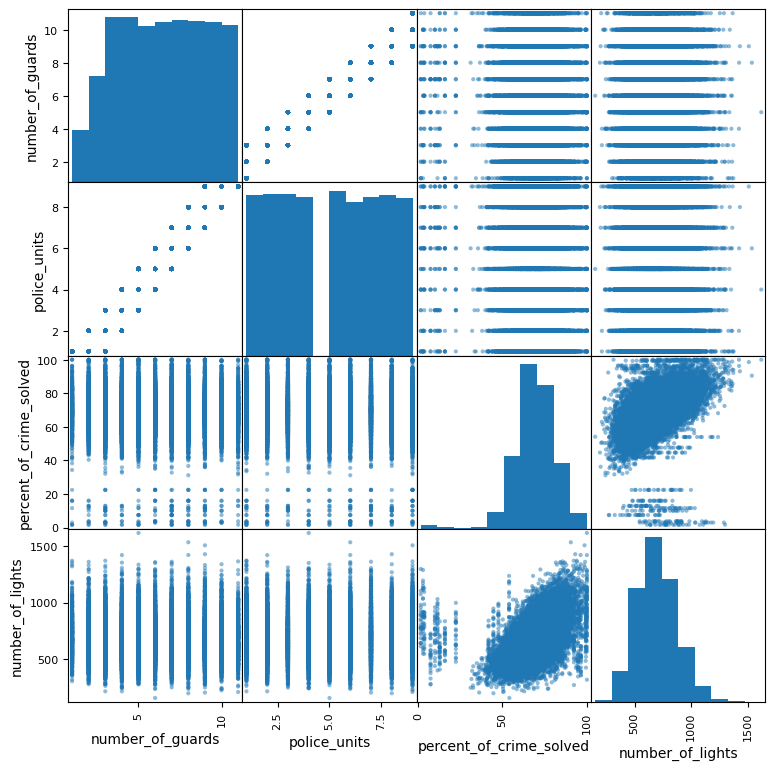

In [26]:
pd.plotting.scatter_matrix(df, figsize=(9, 9));

In [27]:
display(pd.DataFrame(df.corr()).style.background_gradient('coolwarm'))

,number_of_guards,police_units,percent_of_crime_solved,number_of_lights
number_of_guards,1.000000,0.953067,-0.017202,-0.000369
police_units,0.953067,1.000000,-0.014156,0.002416
percent_of_crime_solved,-0.017202,-0.014156,1.000000,0.465525
number_of_lights,-0.000369,0.002416,0.465525,1.000000


Мы видим, что похоже, что есть связь между количеством охраны на складе и полицией в районе, а также между процентом раскрытых перступлений и количеством фонарей.

Проверим, так ли это для каждого склада.

Для начала подготовим функцию для подсчета коэффициентов Пирсона и Спирмана, а также их уровень значимости.

In [28]:
def df_corr_chec(data = df, first_par = 'number_of_guards', second_par = 'percent_of_crime_solved'):
        
    """
    Функция для подсчета коэффициентов корреляции Пирсона и Спирмана, а также их уровня значимости
    
    Args:
        data(pd.DataFrame): датафрейм,
        first_par(str): название столбца, который примем за первый параметр для сравнения
        second_par(str): название столбца, который примем за второй параметр сравнения
        
    Returns:
       coeffs(pd.DataFrame):  датафрейм с подствечем коэффициентов Пирсона и Спирмана для каждого района и склада.
    """
    
    coeffs = pd.DataFrame(columns=['district', 'warehouse_name', 'pearson_cor', 'pearson_pv', 'spearman_cor', 'spearman_pv'])
    counter = 0
    for districts in data['district'].unique():
        for warehouses in data['warehouse_name'].unique():
            temp = data.query('district == @districts & warehouse_name == @warehouses')
              
            kp = pearsonr(temp[first_par], temp[second_par])
            ks = spearmanr(temp[first_par], temp[second_par])
            
            
            #все продажи автодиллеров после меркур авто суммируем и записываем в строку
            check_row =  {'district':districts,
                          'warehouse_name':warehouses,
                          'pearson_cor':kp[0],
                          'pearson_pv':kp[1],
                          'spearman_cor':ks[0],
                          'spearman_pv':ks[1],
                         }

            #создаем датафрейм
            check_row = pd.DataFrame(data=check_row, index=[counter])

            #прсиоединяем строку с оставшимися диллерами к датафрейму
            coeffs = pd.concat([coeffs, check_row])  
            counter += 1

    coeffs = coeffs.style.apply(lambda x: ['color:red'  if v < 0.05  else '' for v in x], subset=['pearson_pv', 'spearman_pv'], axis=1)
    return coeffs
            

### Связь между количеством полицейских в районе и охраной на складе

Выдвенем гипотезы.  
  
Нулевая гипотеза - есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских и количеством охраны статистически значима.  
Альтернативная гипотеза - нет оснований полагать, что взаимосвязь (корреляция) между количеством полицейских и количеством охраны статистически значима.  
  
Уровень статистической значимости (p-value) здесь и далее будем считать равным 0,05. 

In [29]:
police_guards = df_corr_chec(df, 'police_units', 'number_of_guards')
display(police_guards)

,district,warehouse_name,pearson_cor,pearson_pv,spearman_cor,spearman_pv
0,Мышеостровский,Колбасовы,0.950587,0.000000,0.953349,0.000000
1,Мышеостровский,Молочковы,0.951921,0.000000,0.955204,0.000000
2,Мышеостровский,Мятновы,0.955313,0.000000,0.958226,0.000000
3,Мышеостровский,Сметанинковы,0.950307,0.000000,0.954237,0.000000
4,Краснокотейский,Колбасовы,0.957736,0.000000,0.960163,0.000000
5,Краснокотейский,Молочковы,0.950845,0.000000,0.953815,0.000000
6,Краснокотейский,Мятновы,0.951313,0.000000,0.955211,0.000000
7,Краснокотейский,Сметанинковы,0.953396,0.000000,0.956748,0.000000
8,Мышесельский,Колбасовы,0.953029,0.000000,0.956664,0.000000
9,Мышесельский,Молочковы,0.955615,0.000000,0.956219,0.000000


Как мы видим, для всех складов есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских и количеством охраны статистически значима.   
Можем предположить, что охраны, как и полицейских, больше в неблагоприятных районах.

### Связь между количеством фонарей и процентом раскрытия преступлений

Выдвенем гипотезы.  
  
Нулевая гипотеза - есть основание полагать, что взаимосвязь (корреляция) между количеством фонарей в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  
Альтернативная гипотеза - нет оснований полагать, что взаимосвязь (корреляция) между количеством фонарей в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  

In [30]:
lights_crime = df_corr_chec(df, 'number_of_lights', 'percent_of_crime_solved')
display(lights_crime)

,district,warehouse_name,pearson_cor,pearson_pv,spearman_cor,spearman_pv
0,Мышеостровский,Колбасовы,0.472167,0.000000,0.536808,0.000000
1,Мышеостровский,Молочковы,0.477417,0.000000,0.553369,0.000000
2,Мышеостровский,Мятновы,0.445170,0.000000,0.517659,0.000000
3,Мышеостровский,Сметанинковы,0.494715,0.000000,0.576430,0.000000
4,Краснокотейский,Колбасовы,0.474587,0.000000,0.536322,0.000000
5,Краснокотейский,Молочковы,0.445154,0.000000,0.551253,0.000000
6,Краснокотейский,Мятновы,0.443068,0.000000,0.557673,0.000000
7,Краснокотейский,Сметанинковы,0.460227,0.000000,0.542580,0.000000
8,Мышесельский,Колбасовы,0.419366,0.000000,0.517556,0.000000
9,Мышесельский,Молочковы,0.444319,0.000000,0.538961,0.000000


Для всех складов есть основание полагать, что взаимосвязь (корреляция) между количеством фонарей в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.     
Можем предположить, что чем больше в районе фонарей, тем заметнее преступники, и тем проще их поймать.

### Связь между количеством полицейских и процентом раскрытия преступлений

Выдвенем гипотезы.  
  
Нулевая гипотеза - есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  
Альтернативная гипотеза - нет оснований полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  

In [31]:
police_crime = df_corr_chec(df, 'police_units', 'percent_of_crime_solved')
display(police_crime)

,district,warehouse_name,pearson_cor,pearson_pv,spearman_cor,spearman_pv
0,Мышеостровский,Колбасовы,-0.030361,0.415968,-0.034803,0.351072
1,Мышеостровский,Молочковы,-0.004115,0.912222,0.010724,0.773909
2,Мышеостровский,Мятновы,0.072170,0.052908,0.089581,0.016200
3,Мышеостровский,Сметанинковы,-0.016435,0.659748,-0.025509,0.494355
4,Краснокотейский,Колбасовы,-0.021454,0.565476,-0.049471,0.184856
5,Краснокотейский,Молочковы,-0.036947,0.322167,-0.004965,0.894195
6,Краснокотейский,Мятновы,0.030907,0.407624,0.014444,0.698813
7,Краснокотейский,Сметанинковы,-0.069649,0.061776,-0.088880,0.017057
8,Мышесельский,Колбасовы,-0.048534,0.193322,-0.061272,0.100429
9,Мышесельский,Молочковы,-0.007018,0.850882,-0.013033,0.726992


Как мы видим, только для одного склада, а именно Колбасовы в районе Приморский есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  Причем коэффициент корреляции отрицательный, что может говороить об обратной зависимости: чем меньше полицейских в районе, тем лучше раскрываются преступления.  
Для остальных складов нет основания полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.  

**Вывод**  


Мы проверили взаимосвязь между данными:

- Для всех складов есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских и количеством охраны статистически значима. Можем предположить, что охраны, как и полицейских, больше в неблагоприятных районах.
- Есть основание полагать, что взаимосвязь (корреляция) между количеством фонарей в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима. Можем предположить, что чем больше в районе фонарей, тем заметнее преступники, и тем проще их поймать.
- Только для одного склада, а именно Колбасовы в районе Приморский есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима. Причем коэффициент корреляции отрицательный, что может говороить об обратной зависимости: чем меньше полицейских в районе, тем лучше раскрываются преступления. Для остальных складов нет основания полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.

## Вывод

Мы подготовили данные к анализу:

- привели название колонок к нижнему регистру;
- проверили датасеты на пропуски;
- проверили на явные и неявные дубли;
- объединили датафреймы в один;
- привели формат колонки дат к формату даты.

Мы провели исследовательский анализ данных:

- в датафрейме есть ежедневные данные с 6 февраля 2022 года по 26 января 2024 года;
- на складах бывает от 1 до 11 охранников, в среднем около 6 охранников;
- в районе может быть от 1 до 9 полицейских, в среднем около 5;
- за время наблюдения процент раскрытия преступлений был от 1,7% до 100%, в среднем около 69%, можно сказать, что преступления раскерываются в основном от 40 до 98%;
- было от 151 до 1691 фонарей в районе, в среднем около 690, можно сказать, что в основном в районах от 200 до 1200 фонарей.

Мы проверили взаимосвязь между данными:

- Для всех складов есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских и количеством охраны статистически значима. Можем предположить, что охраны, как и полицейских, больше в неблагоприятных районах.
- Есть основание полагать, что взаимосвязь (корреляция) между количеством фонарей в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима. Можем предположить, что чем больше в районе фонарей, тем заметнее преступники, и тем проще их поймать.
- Только для одного склада, а именно Колбасовы в районе Приморский есть основание полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима. Причем коэффициент корреляции отрицательный, что может говороить об обратной зависимости: чем меньше полицейских в районе, тем лучше раскрываются преступления. Для остальных складов нет основания полагать, что взаимосвязь (корреляция) между количеством полицейских в районе и процентом раскрытых преступлений по уничтожению фонарей в районе статистически значима.

## Рекомендации

Есть основания полагать, что для увеличения раскрываемости преступлений  необходимо увеличивать количество фонарей в районе.  
Также есть основание полагать, что увеличение количества полицейских не приведет к увеличению процента раскрытия преступлений.

[ТГ автора]( https://t.me/GermanLarin)